Denne notebook gennemgår nogle af Python-biblioteket Pandas’ mange muligheder. Pandas er et bibliotek i Python, som man benytter til at arbejde med data, der er struktureret i rækker og kolonner. Man vil ofte vælge at strukturere sine data i rækker og kolonner, hvis man har samlet meget data, og der findes også mange datasæt, som allerede er struktureret således. Med lidt kendskab til Pandas er man godt hjulpet på vej til at kunne give sig i kast med dataanalyse af større datasæt.

Når du skal arbejde med Pandas bliver dette cheatsheet din ven: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Datasættet til denne notebook består af en csv-fil dels med af alle taler i folketinget fra første samling 2009 til første samling 2016, dels med den metadata, der er knyttet til hver tale, f.eks. tid, navn, køn, parti, emne m.m. 

Datasættet består af transkriptioner af taler i Folketinget fra første samling 2009 til og med først samling 2016 (6/10 2009 – 7/9 2017). Til hver tale er der tilknyttet metadata, dels om medlemmet af folketinget ('Name', 'Gender', 'Party', 'Role', 'Title', 'Birth', 'Age'), dels om talen (Date', 'samling', 'Start time', 'End time', 'Time', 'Agenda item', 'Case no', 'Case type', 'Agenda title', 'Subject 1', 'Subject 2').

Datasættet er struktureret i tsv txt-filer, som er formateret i utf-8. Der er en fil per møde.

Kilde: Hansen, Dorte Haltrup and Navarretta, Costanza, 2021, The Danish Parliament Corpus 2009 - 2017, v2, w. subject annotation, CLARIN-DK-UCPH Centre Repository, http://hdl.handle.net/20.500.12115/44.

Til denne opgave har vi samlet tsv filerne i et nyt datasæt, som vi har gemt i en csv fil separeret med pipes. Csv filen er uploadet til sciencedata.dk, hvorfra den kan downloades via url med pandas.read_csv() metoden.

In [2]:
import pandas as pd

Hvis man allerede har data i en dataframe struktur, f.eks. i en csv fil, så kan man indlæse data på denne måde.

In [3]:
df = pd.read_csv('https://sciencedata.dk/shared/825e999a5c13fd22d28d4289fa899ba1?download', sep='|')

In [4]:
df.head(4)

,ID,Date,samling,Start time,End time,Time,Agenda item,Case no,Case type,Agenda title,Subject 1,Subject 2,Name,Gender,Party,Role,Title,Birth,Age,Text
0,20100531100002,2010-05-31,20091,10:00:02,10:00:26,24,2010-05-31-0,0,FM,Punkt 0,other,none,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Mødet er åbnet. Finansudvalget har afgivet: Be...
1,20100531100026,2010-05-31,20091,10:00:26,10:00:55,29,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Forhandlingen er åbnet. Fru Ulla Tørnæs som or...
2,20100531100055,2010-05-31,20091,10:00:55,10:06:25,330,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,Regeringen har sammen med Dansk Folkeparti ind...
3,20100531100625,2010-05-31,20091,10:06:25,10:06:34,9,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Det tror jeg bestemt der gør. Der er en række ...


.shape kan man bruge til at få vist datasættets omfang.

In [5]:
df.shape

(381082, 20)

Det er klart, at der er en række interessante spørgsmål om danske politik, som man kan få svar på med
sådan et datasæt, og nedenfor skal vi prøve at finde svar på nogle af dem, og samtidigt opnå et kendskab til,
hvordan man bruger biblioteket Pandas.

## Sammentælling
Pandas har nogle funktioner der kan bruges til at sammentælle data.

En af funktionerne er .value_count(), der sammentæller alle forekomster af samme værdi.

F.eks. som nedenfor, hvor vi bruge .value_count() til at besvare spørgsmålet om, hvor ofte medlemmer fra de forskellige partier har taget ordet på folketingets talerstol.

In [6]:
df["Party"].value_counts()

Party
S      98271
V      79662
DF     64620
SF     35741
EL     34119
RV     23047
LA     20074
KF     19550
ALT     3922
IA       591
UFG      501
SIU      247
JF       229
T        185
KD       135
SP       123
TF        65
Name: count, dtype: int64

## Visualisering af sammentællinger
Pandas bliver ofte anvendt i kombination med visualiseringsbiblioteket Seaborn. Nedenfor er der et eksempel på et 'countplot'.

C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Partier på talerstolen 2015'),
 Text(0.5, 0, '\nAntal'),
 Text(0, 0.5, 'Parti\n')]

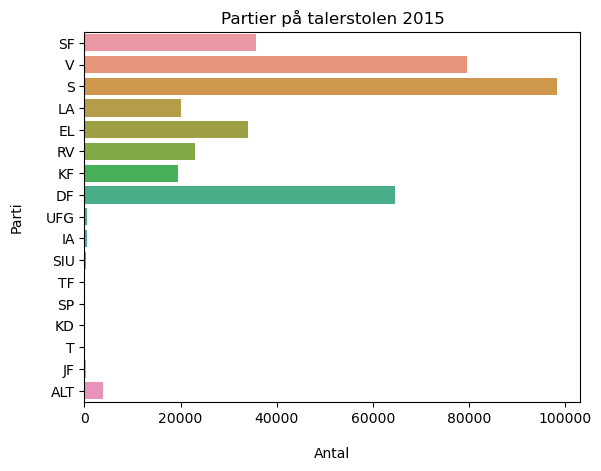

In [7]:
import seaborn as sns
sns.countplot( y = df["Party"], data = df).set(title="Partier på talerstolen 2015" , xlabel='\nAntal', ylabel='Parti\n')

Lad os prøve samme kode igen, men nu vil vi besvare spørgsmålet om, hvilke emner er der blevet talt mest om i 2015?

In [8]:
df["Subject 1"].value_counts()

Subject 1
Economy                       55523
Justice                       40046
other                         37679
Labour                        35402
Social Affairs                24679
Immigration                   24577
Education                     23097
Health care                   20463
Infrastructure                16677
Foreign Affairs               15169
Environment                   14217
Local and regional affairs    11386
Agriculture                   11060
Business                      10773
Energy                         9532
Culture                        9378
Housing                        8305
European Integration           5687
Defence                        5160
Territories                    2272
Name: count, dtype: int64

C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Emner'), Text(0.5, 0, '\nAntal'), Text(0, 0.5, 'Parti\n')]

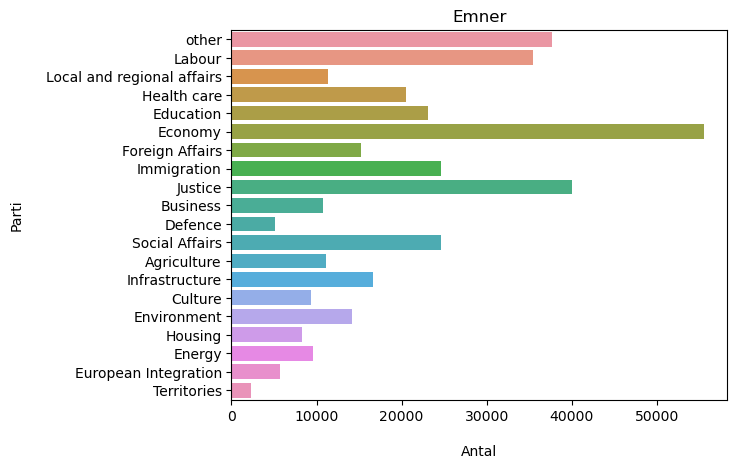

In [9]:
sns.countplot( y = df["Subject 1"], data = df).set(title="Emner", xlabel='\nAntal', ylabel='Parti\n')

## Lav et 'Subset' dvs. udvælg en eller flere kolonner

Man kan vælge flere kolonner med specifikke navne med df[['kol1', 'kol2', ... ]]. Læg mærke til at man skal
bruge to firkantede paranteser ved start og slut.

In [10]:
df[['Party', 'Text']]

,Party,Text
0,SF,Mødet er åbnet. Finansudvalget har afgivet: Be...
1,SF,Forhandlingen er åbnet. Fru Ulla Tørnæs som or...
2,V,Regeringen har sammen med Dansk Folkeparti ind...
3,SF,Det tror jeg bestemt der gør. Der er en række ...
4,S,"Tak, hr. formand. Det skal ikke være nogen hem..."
...,...,...
381077,DF,"Jeg vil bare høre, hvem der er øverste myndigh..."
381078,S,Ministeren.
381079,V,"Man kan godt have ptsd, uden at det er udløst ..."
381080,S,Spørgsmålet og spørgetiden er hermed sluttet.


Man kan vælge en enkelt kolonne på denne måde.

In [11]:
df['Party']

0         SF
1         SF
2          V
3         SF
4          S
          ..
381077    DF
381078     S
381079     V
381080     S
381081     S
Name: Party, Length: 381082, dtype: object

Man vil ofte have behov for at få mere data med ud end blot en kolonne, og derfor bruger man ofte denne
metode, hvor man vælger en værdi til at være lig med noget, f.eks. partinavnet skal være lig med 'V'.

In [13]:
df[df['Party'] == 'V']

,ID,Date,samling,Start time,End time,Time,Agenda item,Case no,Case type,Agenda title,Subject 1,Subject 2,Name,Gender,Party,Role,Title,Birth,Age,Text
2,20100531100055,2010-05-31,20091,10:00:55,10:06:25,330,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,Regeringen har sammen med Dansk Folkeparti ind...
6,20100531100728,2010-05-31,20091,10:07:28,10:08:25,57,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,"Som jeg nævnte, er referencen sådan set til, h..."
10,20100531100926,2010-05-31,20091,10:09:26,10:09:53,27,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,"Jamen jeg har sådan set svaret på det. Altså, ..."
14,20100531101049,2010-05-31,20091,10:10:49,10:11:23,34,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,"Jeg mener faktisk, at genopretningspakken er u..."
18,20100531101215,2010-05-31,20091,10:12:15,10:12:49,34,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,Labour,none,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,Som hr. Anders Samuelsen udmærket er klar over...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381062,20161026183426,2016-10-26,20161,18:34:26,18:34:43,17,2016-10-26-2-33,88,S,Spm. nr. S 88: Om skattecentre i Holbæk og Kor...,Economy,none,Karsten Lauritzen,Male,V,minister,Skatteministeren,1983-10-14,33,Størstedelen vil skulle ansættes uden for Regi...
381067,20161026183509,2016-10-26,20161,18:35:09,18:37:35,146,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,Labour,none,Jørn Neergaard Larsen,Male,V,minister,Beskæftigelsesministeren,1949-02-11,67,Tak for spørgsmålet. Må jeg starte med at slå ...
381071,20161026183945,2016-10-26,20161,18:39:45,18:40:32,47,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,Labour,none,Jørn Neergaard Larsen,Male,V,minister,Beskæftigelsesministeren,1949-02-11,67,"Jeg kan love, at vi følger dette område meget ..."
381075,20161026184123-2,2016-10-26,20161,18:41:23,18:42:10,47,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,Labour,none,Jørn Neergaard Larsen,Male,V,minister,Beskæftigelsesministeren,1949-02-11,67,Det tør jeg simpelt hen ikke svare konkret på....


Man kan også få brug for at fremfinde bestemte vendinger eller ord, der indgår i en længere tekst.

Til dette kunne vi bruge df[df['Text'].str.contains('tekststreng')].

Vi kunne f.eks. filtere taler der indeholder tekststrengen 'islam'?

In [15]:
new_df = df[df["Text"].str.contains("islam")]

Vi kan besvare spærgsmålet: Inden for hvilke emner, taler politikerne i folketinget om 'islam'? 

C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Subject 1'>

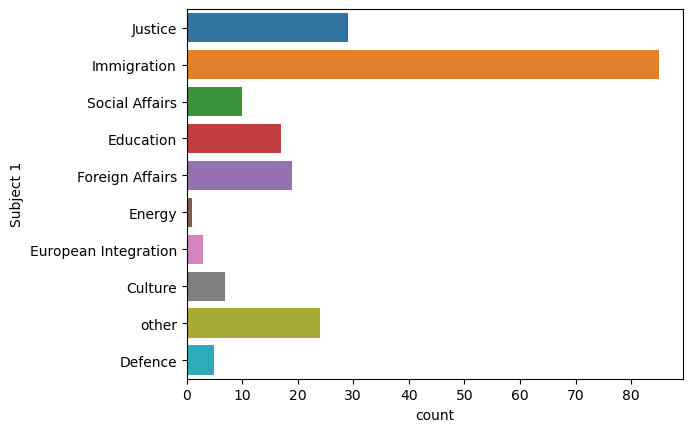

In [25]:
sns.countplot( y = new_df ["Subject 1"], data = df).set(title="Emner", xlabel='\nAntal', ylabel='Parti\n')

# Regex

Nedenfor drejer det sig om at besvare spørgsmålet, hvilket parti taler mest om et ud valgt emne? I dette tilfælde ser vi på ordet 'islam'.

Vi benytter regulære udtryk (regex) til at holde styr på vores søgning. Regex er smart, fordi er udviklet til at fremfinde tekststrenge store datamængder. Regex er selvfølgelig lidt af en hovedpine, fordi det er ret besværligt at komme i gang med at sammesætte udtrykkene.

Vi kan bruge udtrykket '\b' til at ramme starten og slutningen af et ord ('\bislam\b'). På den måde er vi sikre på, at vi kun finder tekststrengen 'islam' og ikke tekststrenge, hvor 'islam' indgår i, f.eks. 'islamisk'.

Når vi er interesseret i at finde ordet 'islam' inklusiv alle endelser skal vi tilføej endelsen .+?\b efter islam.

In [17]:
regex1 = r'\bislam\b'
regex2 = r'\bislam.+?\b'

In [18]:
data_search = df[df['Text'].str.contains(regex1, regex=True)]

C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lakj\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 1.0, 'Hvilket parti taler mest om emnet?'),
 Text(0.5, 0, 'Antal af taler'),
 Text(0, 0.5, 'Parti')]

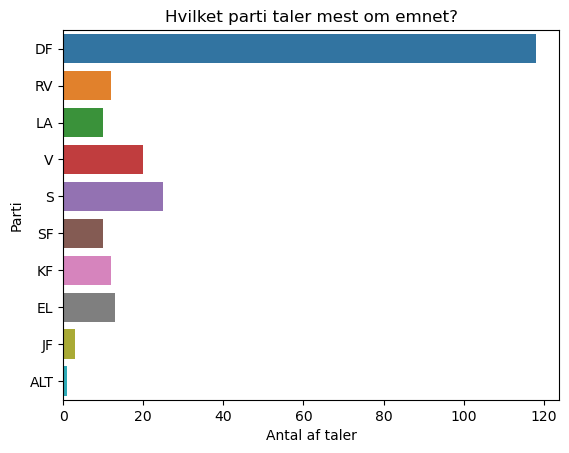

In [19]:
sns.countplot( y = data_search['Party'], 
              data = data_search).set(title='Hvilket parti taler mest om emnet?', 
                                                                 xlabel='Antal af taler', ylabel='Parti')

# Filtrering af data ved brug af flere betingelser

Den boolske operator '&' kan anvendes til i de tilfælde, hvor der er brug for at flere betingelser er opfyldt. Der skal tilføjes nogle parenteser for at holde styr på de forskellige dele.

In [29]:
df['Role'].value_counts()

Role
formand                198786
medlem                 149363
minister                32647
fungerende minister       237
aldersformanden            31
midlertidig formand        18
Name: count, dtype: int64

In [30]:
regex1 = r'\bislam\b'
regex2 = r'\bislam.+?\b'

new_df = df[(df['Role'] == 'medlem') & (df['Text'].str.contains(regex1, regex=True))]

In [31]:
new_df['Name'].value_counts() 

Name
Martin Henriksen            34
Marie Krarup                15
Christian Langballe         12
Søren Espersen              11
Søren Krarup                10
Jesper Langballe             9
Alex Ahrendtsen              9
Johanne Schmidt-Nielsen      8
Karsten Lauritzen            6
Naser Khader                 6
Nick Hækkerup                4
Kenneth Kristensen Berth     4
Rasmus Jarlov                4
Simon Emil Ammitzbøll        4
Mattias Tesfaye              4
Zenia Stampe                 3
Sjúrður Skaale               3
Per Dalgaard                 3
Marcus Knuth                 2
Karen J. Klint               2
Peter Kofod Poulsen          2
Mogens Jensen                2
Louise Schack Elholm         2
Kristian Thulesen Dahl       2
Pernille Bendixen            2
Lisbeth Bech Poulsen         2
Merete Riisager              2
Dan Jørgensen                2
Finn Sørensen                1
Morten Østergaard            1
Peter Juel Jensen            1
Astrid Krag                  1
Mar

# Applicering af funktioner

In [76]:
import re
def calculate_ttr(text):
    # Tranform teksten til lower case 
    text = text.lower()
    
    # Byg ordlister 
    words = re.findall(r'\b\S+\b', text)

    # Beregn total antal af enheder (ord)
    total_tokens = len(words)

    # Beregn antal af unikke typer (unikke ord).
    unique_types = len(set(words))

    # Beregn TTR (Type-Token Ratio) - forholdet mellem totale antal ord og unikke ord 
    ttr = unique_types / total_tokens

    return ttr

In [77]:
df['TTR'] = df['Text'].apply(calculate_ttr)

In [78]:
df

,ID,Date,samling,Start time,End time,Time,Agenda item,Case no,Case type,Agenda title,...,Name,Gender,Party,Role,Title,Birth,Age,Text,TTR,Average_Sentence_Length
0,20100531100002,2010-05-31,20091,10:00:02,10:00:26,24,2010-05-31-0,0,FM,Punkt 0,...,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Mødet er åbnet. Finansudvalget har afgivet: Be...,0.911765,4.625000
1,20100531100026,2010-05-31,20091,10:00:26,10:00:55,29,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,...,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Forhandlingen er åbnet. Fru Ulla Tørnæs som or...,1.000000,3.333333
2,20100531100055,2010-05-31,20091,10:00:55,10:06:25,330,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,...,Ulla Tørnæs,Female,V,medlem,nil,1962-09-04,48,Regeringen har sammen med Dansk Folkeparti ind...,0.462939,21.444444
3,20100531100625,2010-05-31,20091,10:06:25,10:06:34,9,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,...,Holger K. Nielsen,Male,SF,formand,Tredje næstformand,1950-04-23,60,Det tror jeg bestemt der gør. Der er en række ...,0.833333,4.500000
4,20100531100634,2010-05-31,20091,10:06:34,10:07:25,51,2010-05-31-1,222,L,1. behandling af L 222: Om nedsættelse af dagp...,...,Torben Hansen,Male,S,medlem,nil,1965-09-11,45,"Tak, hr. formand. Det skal ikke være nogen hem...",0.546012,11.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381077,20161026184211,2016-10-26,20161,18:42:11,18:42:51,40,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,...,Jeppe Jakobsen,Male,DF,medlem,nil,1988-08-11,28,"Jeg vil bare høre, hvem der er øverste myndigh...",0.758242,22.750000
381078,20161026184251,2016-10-26,20161,18:42:51,18:42:52,1,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,...,Henrik Dam Kristensen,Male,S,formand,Første næstformand,1957-01-31,59,Ministeren.,1.000000,0.500000
381079,20161026184252,2016-10-26,20161,18:42:52,18:43:39,47,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,...,Jørn Neergaard Larsen,Male,V,minister,Beskæftigelsesministeren,1949-02-11,67,"Man kan godt have ptsd, uden at det er udløst ...",0.563636,15.714286
381080,20161026184339,2016-10-26,20161,18:43:39,18:43:41,2,2016-10-26-2-37,111,S,Spm. nr. S 111: Om veteraner der får afslag på...,...,Henrik Dam Kristensen,Male,S,formand,Første næstformand,1957-01-31,59,Spørgsmålet og spørgetiden er hermed sluttet.,1.000000,3.000000
